In [6]:
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import cv2
import numpy as np

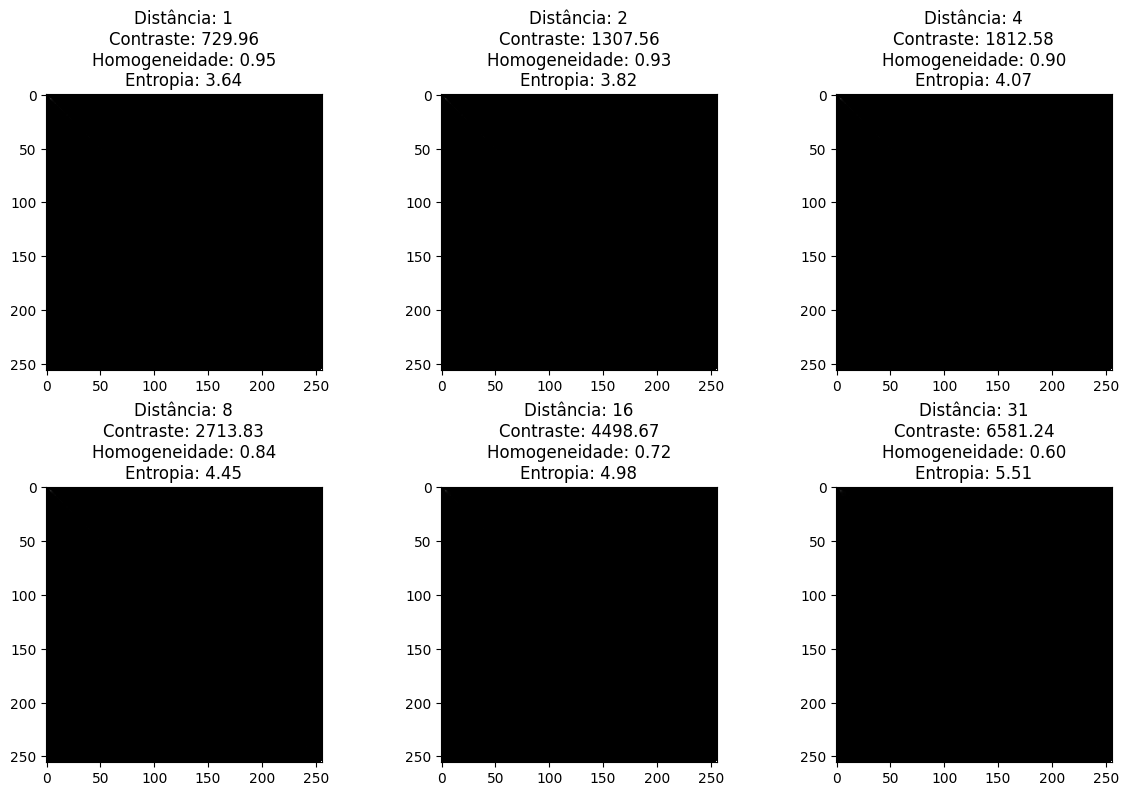

In [15]:
file_path = "haralick_descriptors.png"

if file_path:
    image = cv2.imread(file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertendo a imagem RGB para tons de cinza
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Convertendo a imagem para um array numpy
image = np.array(image_gray)

distances = [1, 2, 4, 8, 16, 31]
angle = 0  # Ângulo constante

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # Altere para 2 linhas e 3 colunas

for i, d in enumerate(distances):
    row = i // 3  # Determina a linha do subplot
    col = i % 3   # Determina a coluna do subplot
    glcm = graycomatrix(image, distances=[d], angles=[angle], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    # greycoprops function does not calculate entropy, so we will calculate it manually
    entropy = -np.sum(glcm*np.log2(glcm + np.finfo(float).eps))
    axs[row, col].imshow(glcm[:, :, 0, 0], cmap='gray')
    axs[row, col].set_title(f'Distância: {d}\nContraste: {contrast:.2f}\nHomogeneidade: {homogeneity:.2f}\nEntropia: {entropy:.2f}')

plt.tight_layout()
plt.show()
